# Studio Ghibli Box-Office Revenue Analysis


# Hi! 
I will be analysing the revenue of all the full-length films made by the famous Japanese film studio, Studio Ghibli. I will be examining the revenue across various features such as genre, director, screenwriter, length, and more. At the end, I will also build a small ML model based on this data, to predict some of the revenues. For now, I'll start with importing the libraries needed for analysis

These are the questions I will look at: 

**Preliminary:** 
* How does the dataset look like?
* What are the datatypes of the values and do they need to converted to another type?
* Are there missing values?

**Basic:** 
* Which movies were the highest-performing in terms of box-office revenue?
* Which genres were the highest-performing?

**Analysis:** 
* What is the ROI per movie?
* Does a higher budget indicate higher revenue?
* Which decade had the highest revenue per movie, and how has it changed over the years?

**(In Progress) Machine Learning Implementation:**
* I'll be using a Random Forest model to predict the revenue of the movies, since it appears to not only depend on the budget, during a preliminary scan of the data. 



In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/studio-ghibli-films-dataset/Studio Ghibli Films.csv
/kaggle/input/studio-ghibli-films-dataset/README.md
/kaggle/input/studio-ghibli-films-dataset/License.txt


Will start with importing the required libraries. 

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

#for building a model to predict revenues of the movies: 
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

print("finished loading required libraries")

finished loading required libraries


In [34]:
#loading the dataset. 
movie_filepath= '/kaggle/input/studio-ghibli-films-dataset/Studio Ghibli Films.csv'
movie_data =pd.read_csv(movie_filepath)
# to test output: print(movie_data.head()) or tail()

# Q0. Preliminary. 


In [35]:
#Replacing all empty spaces with NaN values: 
movie_data.replace("", np.nan, inplace=True)
# to test if it's replaced the values correctly, run: movie_data

In [36]:
movie_data['Budget'] = movie_data['Budget'].replace('[\$,]', '', regex=True).astype(float)
movie_data['Revenue'] = movie_data['Revenue'].replace('[\$,]', '', regex=True).astype(float)

# Q1. Which movies were the most successful at the Box Office? 

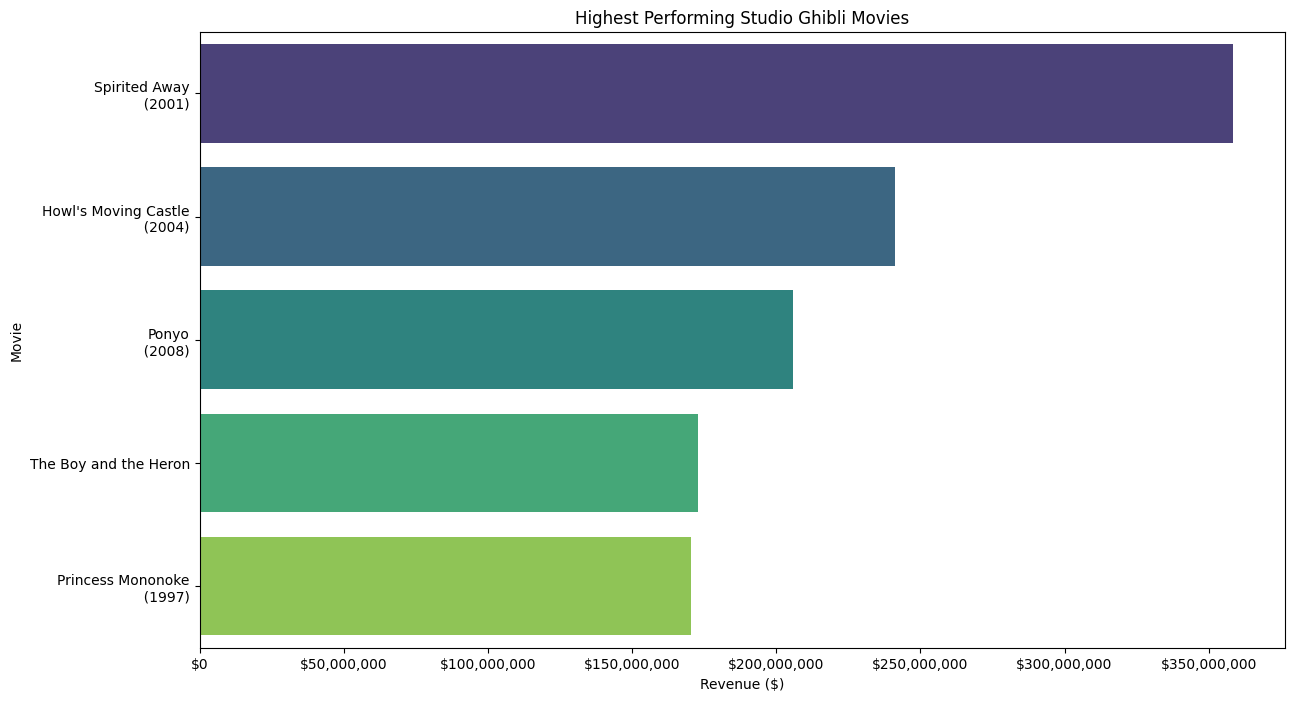

In [37]:
import matplotlib.ticker as ticker

highestRevenue_movies= movie_data.sort_values(by='Revenue', ascending = False)
highestRevenue_movies_graph= highestRevenue_movies[['Name', 'Revenue']].head()

highestRevenue_movies_graph
plt.figure(figsize=(14, 8))

sns.barplot(data=highestRevenue_movies_graph, x='Revenue', y='Name', palette='viridis')

#to include the revenue numbers in a readable way: 
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))


plt.title('Highest Performing Studio Ghibli Movies')
plt.xlabel('Revenue ($)')
plt.ylabel('Movie')
plt.show()

# Q2. Which genres were the most succesful? 

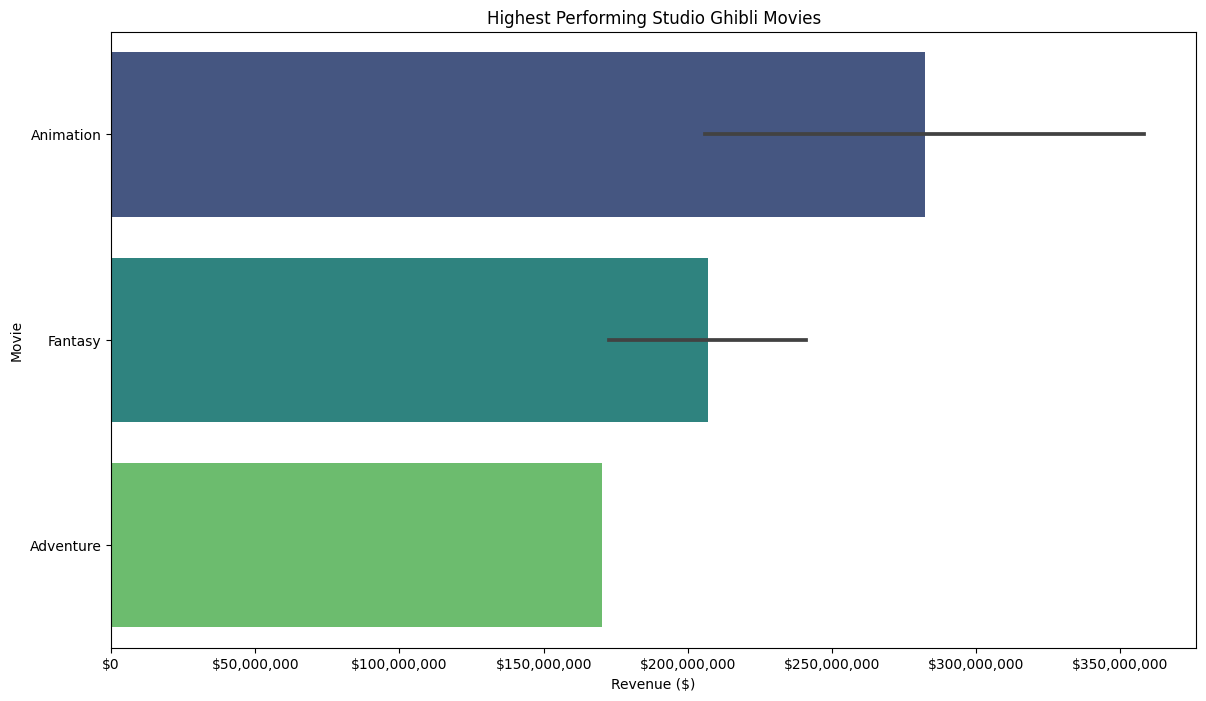

In [38]:
highestRevenue_movies= movie_data.sort_values(by='Revenue', ascending = False)
highestRevenue_movies_graph= highestRevenue_movies[['Genre 1', 'Revenue']].head()

highestRevenue_movies_graph
plt.figure(figsize=(14,8))

sns.barplot(data=highestRevenue_movies_graph, x='Revenue', y='Genre 1', palette='viridis')

#to include the revenue numbers in a readable way: 
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))


plt.title('Highest Performing Studio Ghibli Movies')
plt.xlabel('Revenue ($)')
plt.ylabel('Movie')
plt.show()

There is an error bar running through Fantasy and Animation. This suggests that there is a lot of variability in the revenue made by these genres. This might mean that genre is not a perfect measure of box office success, and may not help much in the prediction of it. 

# Q3. Who directed the top performing movies?
Miyazaki is the most well-known, but how is the distribution among the directors?

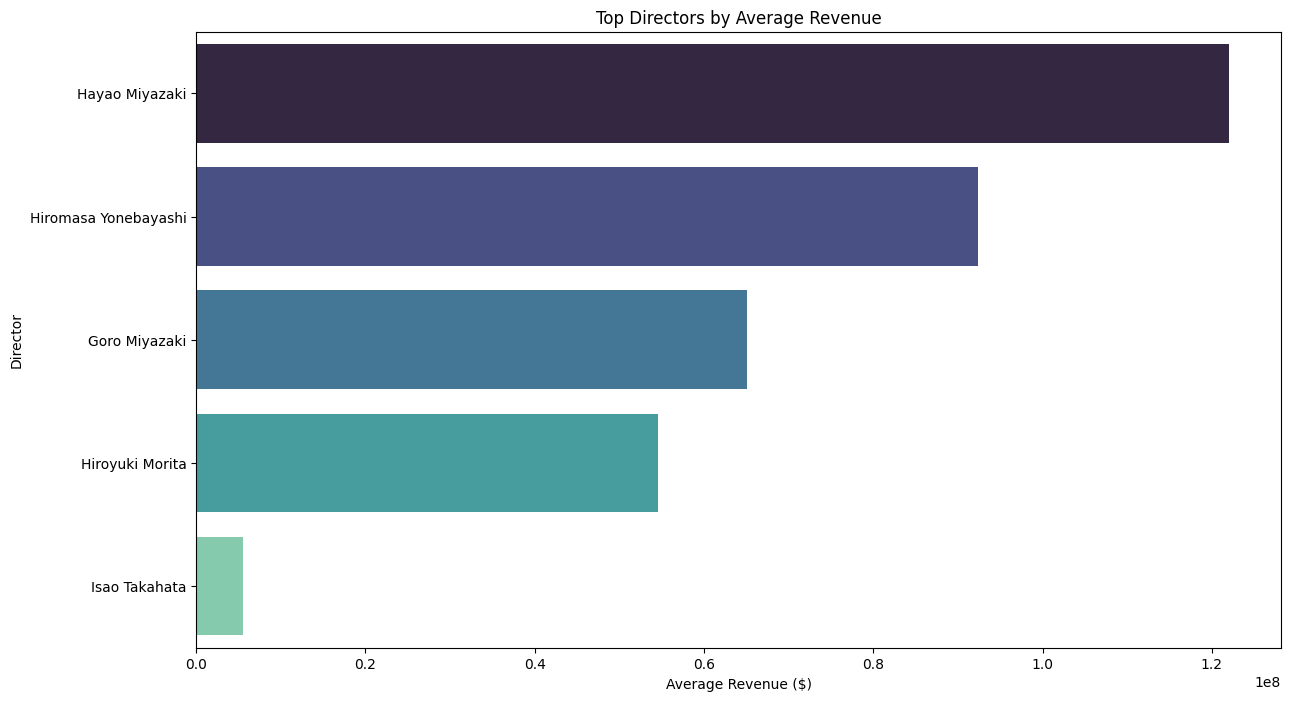

In [39]:
#These groupby's in python are very similar to the SQL commands

topRevenue_byDirector = movie_data.groupby('Director')['Revenue'].mean().sort_values(ascending=False).head()

plt.figure(figsize=(14, 8))
sns.barplot(x=topRevenue_byDirector.values, y=topRevenue_byDirector.index, palette='mako')
plt.title('Top Directors by Average Revenue')
plt.xlabel('Average Revenue ($)')
plt.ylabel('Director')
plt.show()





# Q4. Does a higher budget indicate higher success?

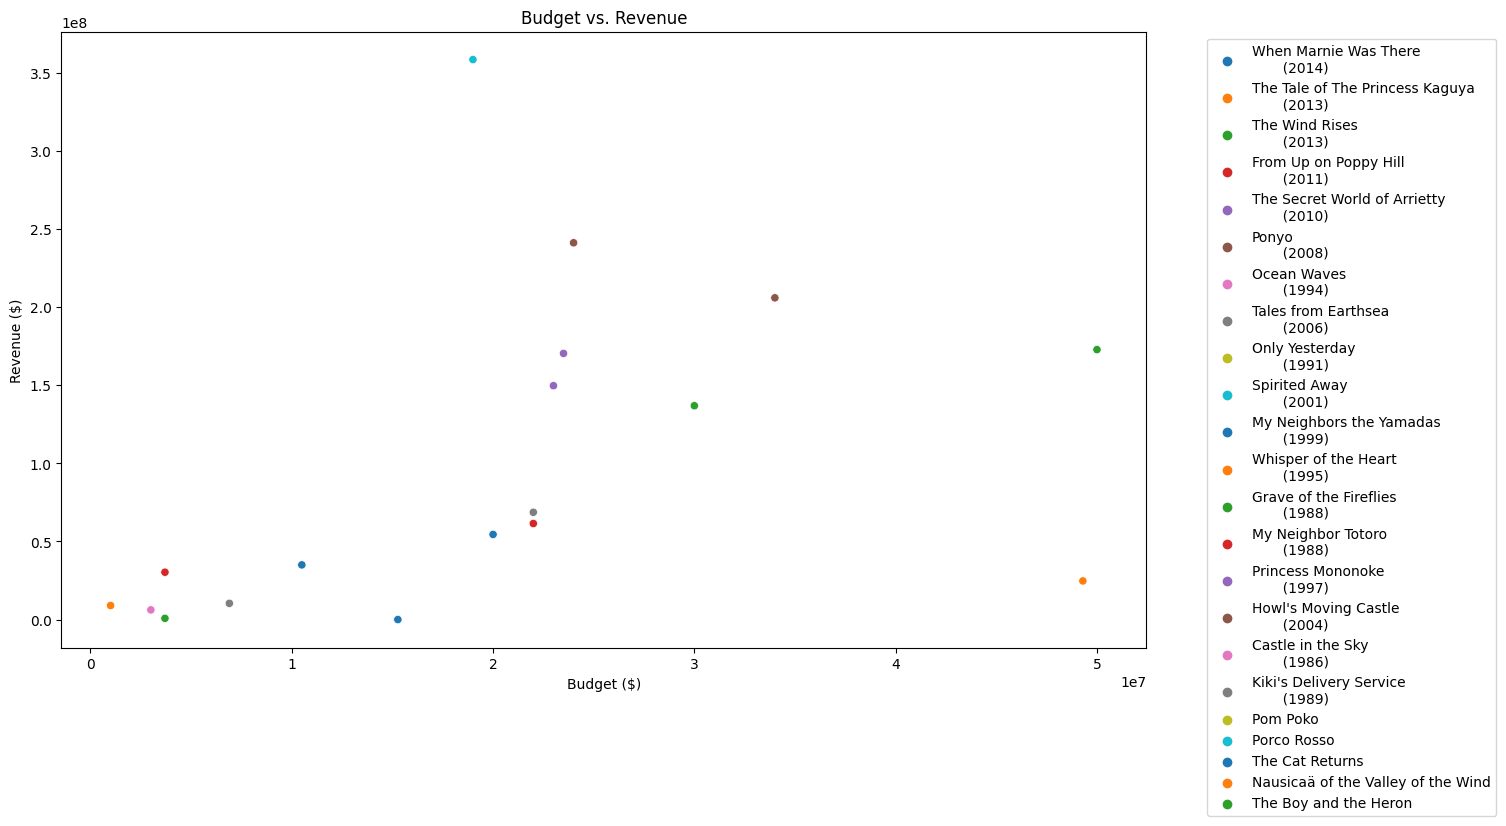

In [40]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=movie_data, x='Budget', y='Revenue', hue='Name', palette='tab10')
plt.title('Budget vs. Revenue')
plt.xlabel('Budget ($)')
plt.ylabel('Revenue ($)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


There seems to be slight correlation so a line of best fit can be drawn to see further. 

<Axes: xlabel='Budget', ylabel='Revenue'>

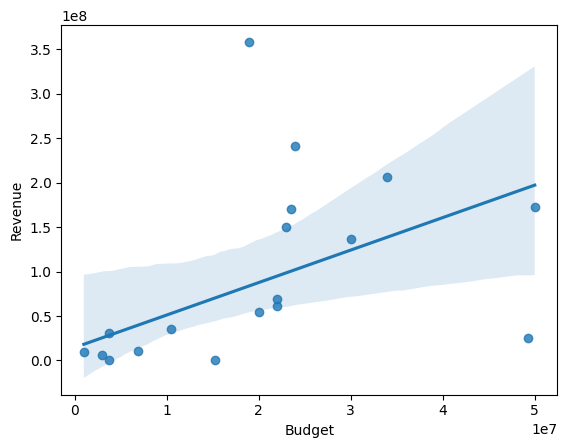

In [41]:
sns.regplot(data=movie_data, x='Budget', y='Revenue', robust=True)
#using robust=True to give less weight to outsiders. 


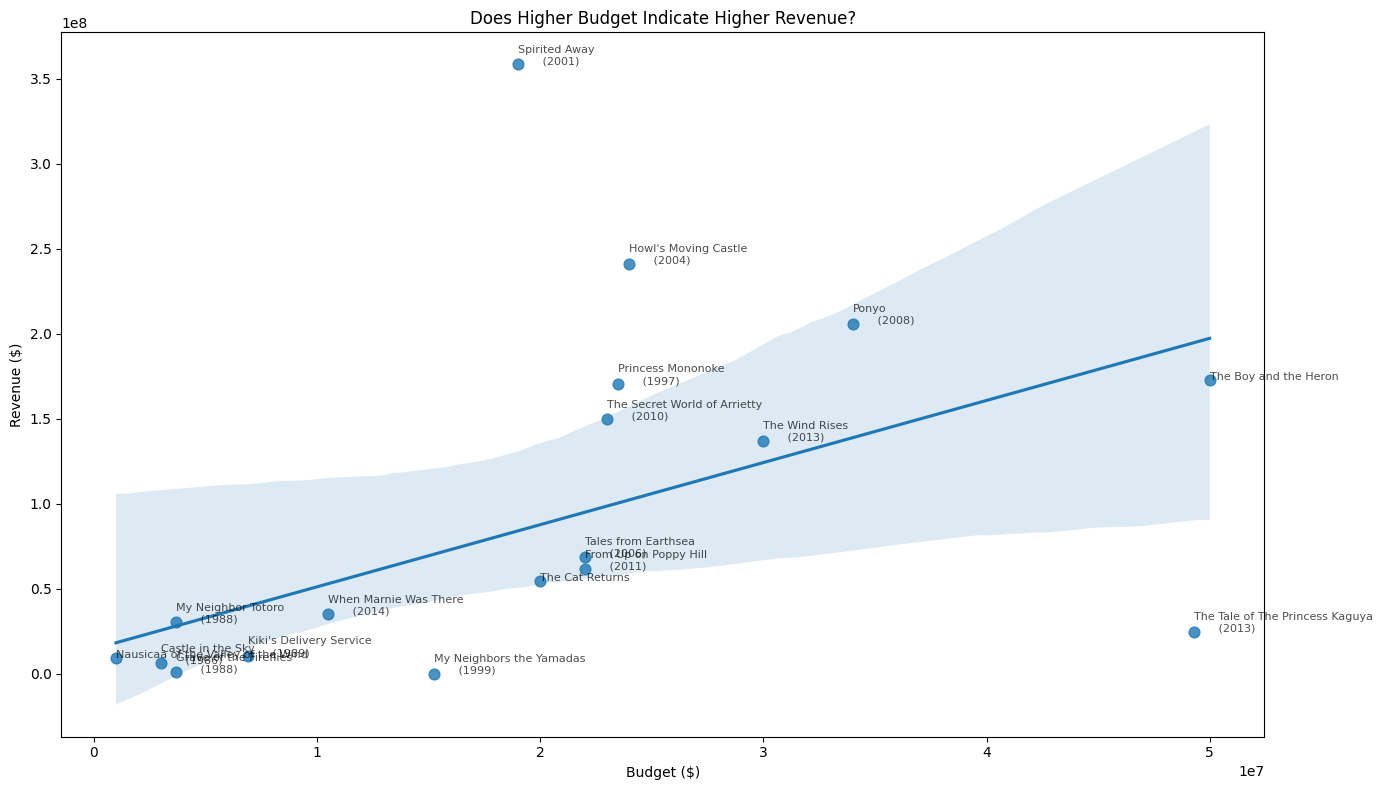

In [42]:
#To see the same graph, with the movie names

plt.figure(figsize=(14, 8))
sns.regplot(data=movie_data, x='Budget', y='Revenue', scatter_kws={'s': 60}, robust=True)

for i, row in movie_data.iterrows():
    plt.text(row['Budget'], row['Revenue'], row['Name'], fontsize=8, alpha=0.7)

plt.title('Does Higher Budget Indicate Higher Revenue?')
plt.xlabel('Budget ($)')
plt.ylabel('Revenue ($)')
plt.tight_layout()
plt.show()


The big outliers seem to be 'The Tale of Princess Kaguya'( having a big budget but comparitevely lesser revenue), and 'Spirited Away' (having a lesser budget comparitely with a high revenue amount). 

*The Tale of Princess Kaguya* had a much higher budget than the box office revenue. This is one of the most expensive studio ghibli films, having a budget of $49,300,000 .This budget is only topped by The Boy and the Heron, the recent release of 2023. 

Despite its budget, it could not perform more than its budget. Perhaps the reason could lie in the differentiating factors between this movie and the other films from the Studio. It was animated using watercolor-like style, and a slower, thoughtful pace.

# Q5. Which movies had the highest ROI? (Return on investment)

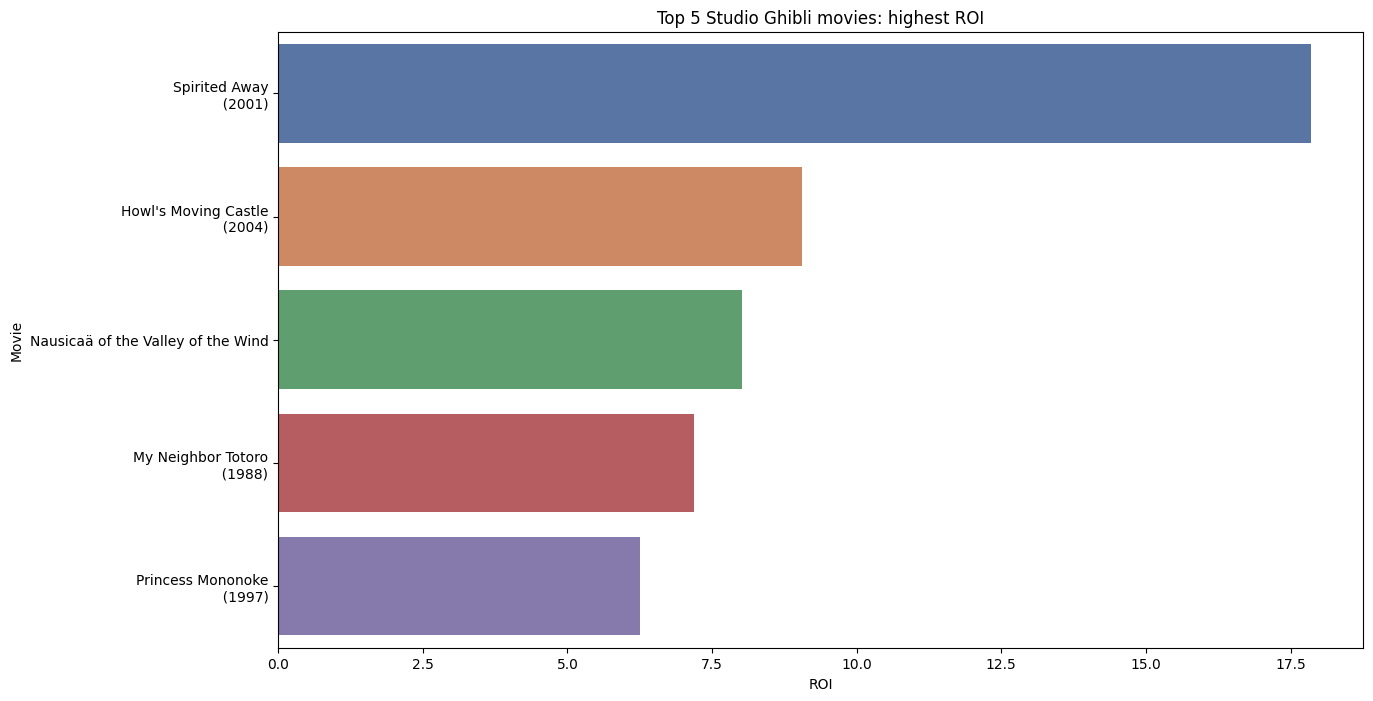

In [43]:


movie_data['ROI'] = (movie_data['Revenue'] - movie_data['Budget']) / movie_data['Budget']

highest_ROI = movie_data.sort_values(by='ROI', ascending=False).head()

plt.figure(figsize=(14, 8))
sns.barplot(data=highest_ROI, x='ROI', y='Name', palette='deep')
plt.title('Top 5 Studio Ghibli movies: highest ROI')
plt.xlabel('ROI')
plt.ylabel('Movie')
plt.show()


*Spirited Away*, *Howl's moving castle*, *Princess Monoke*, are all part of the top five box-office performing movies of the studio. (q1)

# Q6. Which decade had the highest revenue per movie on average? 

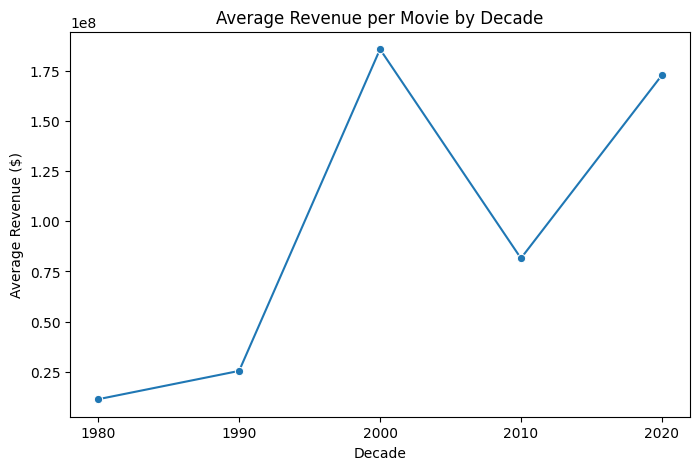

In [45]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


movie_data['Decade'] = (movie_data['Year'] // 10) * 10

decade_revenue = movie_data.groupby('Decade')['Revenue'].mean().sort_index()

plt.figure(figsize=(8, 5))
sns.lineplot(x=decade_revenue.index, y=decade_revenue.values, marker='o')
plt.title('Average Revenue per Movie by Decade')
plt.xlabel('Decade')
plt.ylabel('Average Revenue ($)')
plt.xticks(decade_revenue.index)
plt.show()




The movies in the 2000's had the highest average movie revenue by a lot, followed by the 2010's, then the 1990's, then the 1980's.

2000's performance is because of breakthrough successes like *Howl's Moving Castle*, *Spirited Away*, and *Ponyo*, which are the top three box office performing movies from Studio Ghibli. But it is important to note 2010's also had successes like T*he Secret World of Arrietty* and *The Wind Rises*, and it still had a much higher average revenue than the 1990's and the 1980's.

Information about the 2020's is still limited, but it looks promising as the film that was released in 2023: *The Boy and the Heron*, is the fourth highest Box Office Performing movie of the Studio, amassing a $172,766,713 revenue.

After the 2000's, the films performed much better than before. This is perhaps because of the exposure to international audiences. The increase in popularity of Japanese films and animations have increased, providing a larger audience for the newer releases.

# Future Work

**Adjust for Inflation**: Analyze revenues in inflation-adjusted terms for a fair comparison.

**Explore Movie Count**: Examine whether fewer releases in the 2010s contributed to the revenue decline.

**Global Market Influence**: Investigate how Ghibli's expansion to international markets impacted revenues.

**Adjust for Impact**: Using BoxOffice Revenue is an imperfect metric of success. For example, *My Neighbour Totoro*, had lesser Box Office than its budget, but it has since become one of the most iconic films, in the era of streaming and global audience. This should be accounted for in the future.